Yahia Abbas 2000876
Mohamed Hanafi 2000656

The imports and generationof any function we might need later

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

The First Part of our Project is opening the tables and getting a feel of the data and as we observe we can begin to integrate the data

In [3]:
flights = pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

C:\Users\Yahia\AppData\Local\Temp\ipykernel_12264\884131147.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


In [4]:
flights.head()
flights.columns
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [5]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


After acessing the data we can determine that the data can be joined on the following attributes :


flights.ORIGIN_AIRPORT = airports.IATA_CODE


flights.DESTINATION_AIRPORT = airports.IATA_CODE
flights.AIRLINE = airlines.IATA_CODE


flights.DESTINATION_AIRPORT = airports.IATA_CODE
flights.AIRLINE = airlines.IATA_CODE


In [7]:
mergedPD =pd.merge(flights, airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

After Intial Merging We need to rename columns to little ensure a no confusion

In [8]:

mergedPD.rename(columns={'IATA_CODE': 'DEST_AIRPORT_IATA_CODE',
                   'AIRPORT': 'DEST_AIRPORT_NAME',
                   'CITY': 'DEST_AIRPORT_CITY',
                   'STATE': 'DEST_AIRPORT_STATE',
                   'COUNTRY': 'DEST_AIRPORT_COUNTRY',
                   'LATITUDE': 'DEST_AIRPORT_LATITUDE',
                    'LONGITUDE': 'DEST_AIRPORT_LONGITUDE',
                   },
          inplace=True, errors='raise')

mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEST_AIRPORT_IATA_CODE,DEST_AIRPORT_NAME,DEST_AIRPORT_CITY,DEST_AIRPORT_STATE,DEST_AIRPORT_COUNTRY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


We can now continue to alter the merged database to enclose all outputs

In [9]:
mergedPD =pd.merge(mergedPD, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [10]:
mergedPD.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT_IATA_CODE',
                   'AIRPORT': 'ORIGIN_AIRPORT_NAME',
                   'CITY': 'ORIGIN_AIRPORT_CITY',
                   'STATE': 'ORIGIN_AIRPORT_STATE',
                   'COUNTRY': 'ORIGIN_AIRPORT_COUNTRY',
                   'LATITUDE': 'ORIGIN_AIRPORT_LATITUDE',
                    'LONGITUDE': 'ORIGIN_AIRPORT_LONGITUDE',
                   },
          inplace=True, errors='raise')

mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DEST_AIRPORT_COUNTRY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_IATA_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


We have now successfully integrated flights and airports now we must add in airlines

In [11]:
mergedPD =pd.merge(mergedPD, airlines, left_on='AIRLINE', right_on='IATA_CODE')


In [12]:
mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_IATA_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.


In [13]:
mergedPD.rename(columns={'IATA_CODE': 'AIRLINE_IATA_CODE',
                   'AIRLINE_y': 'AIRLINE_NAME'
                   
                   },
          inplace=True, errors='raise')


Now to check the data in the merged data frame to observe the distribution of the data

In [14]:
mergedPD.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE
count,5332914.0,5.332914e+06,5.332914e+06,5.332914e+06,5.332914e+06,5.332914e+06,5.249100e+06,5.249100e+06,5.246302e+06,5.246302e+06,...,5.332914e+06,1.003360e+06,1.003360e+06,1.003360e+06,1.003360e+06,1.003360e+06,5.328304e+06,5.328304e+06,5.328309e+06,5.328309e+06
mean,2015.0,6.207210e+00,1.568874e+01,3.919179e+00,2.178419e+03,1.330107e+03,1.336074e+03,9.774568e+00,1.610290e+01,1.357926e+03,...,1.639441e-02,1.348775e+01,7.768398e-02,1.890343e+01,2.368808e+01,2.980992e+00,3.663795e+01,-9.549102e+01,3.663806e+01,-9.549123e+01
std,0.0,3.383807e+00,8.774687e+00,1.993635e+00,1.760521e+03,4.843130e+02,4.974114e+02,3.759233e+01,8.991109e+00,4.990460e+02,...,1.269868e-01,2.807241e+01,2.180048e+00,4.787141e+01,4.332698e+01,2.062003e+01,5.999285e+00,1.815616e+01,5.999338e+00,1.815637e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.348345e+01,-1.766460e+02,1.348345e+01,-1.766460e+02
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.310000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.289595e+01,-1.119778e+02,3.289595e+01,-1.119778e+02
50%,2015.0,6.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.331000e+03,-1.000000e+00,1.400000e+01,1.343000e+03,...,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,3.736186e+01,-9.025803e+01,3.736186e+01,-9.025803e+01
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.252000e+03,1.730000e+03,1.741000e+03,8.000000e+00,1.900000e+01,1.755000e+03,...,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,3.000000e+01,0.000000e+00,4.078839e+01,-8.168786e+01,4.078839e+01,-8.168786e+01
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,7.128545e+01,-6.479856e+01,7.128545e+01,-6.479856e+01


In [15]:
mergedPD.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEST_AIRPORT_IATA_CODE',
       'DEST_AIRPORT_NAME', 'DEST_AIRPORT_CITY', 'DEST_AIRPORT_STATE',
       'DEST_AIRPORT_COUNTRY', 'DEST_AIRPORT_LATITUDE',
       'DEST_AIRPORT_LONGITUDE', 'ORIGIN_AIRPORT_IATA_CODE',
       'ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_CITY', 'ORIGIN_AIRPORT_STATE',
       'ORIGIN_AIRPORT_COUNTRY', 'ORIGIN_AIRPORT_LATITUDE',
       'ORIGIN_AIRPORT_LONGITUDE', 'AIRLINE_IATA_CODE', 'AIRLINE_NAME'],
      dtype='object')

We have successfully integrated all data sets into one large data frame

We must now begin cleaning our data 

First To drop repeated columns as a result of merging

In [16]:
mergedPD.drop(columns=["ORIGIN_AIRPORT", "AIRLINE_x","DESTINATION_AIRPORT"], axis=1, inplace=True)

Second to drop columns with an influx of null values

In [17]:
mergedPD.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
FLIGHT_NUMBER                     0
TAIL_NUMBER                   14367
SCHEDULED_DEPARTURE               0
DEPARTURE_TIME                83814
DEPARTURE_DELAY               83814
TAXI_OUT                      86612
WHEELS_OFF                    86612
SCHEDULED_TIME                    6
ELAPSED_TIME                 101784
AIR_TIME                     101784
DISTANCE                          0
WHEELS_ON                     89942
TAXI_IN                       89942
SCHEDULED_ARRIVAL                 0
ARRIVAL_TIME                  89942
ARRIVAL_DELAY                101784
DIVERTED                          0
CANCELLED                         0
CANCELLATION_REASON         5245484
AIR_SYSTEM_DELAY            4329554
SECURITY_DELAY              4329554
AIRLINE_DELAY               4329554
LATE_AIRCRAFT_DELAY         4329554
WEATHER_DELAY               

In [18]:
mergedPD.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1, inplace = True) 

In [19]:
mergedPD.drop(['TAIL_NUMBER'], axis = 1, inplace = True) 

We removed this row as we will not be needing it in our analysis

In [20]:
mergedPD = mergedPD.dropna(subset=['DEST_AIRPORT_IATA_CODE'])

In [21]:
mergedPD = mergedPD.dropna(subset=['SCHEDULED_TIME'])

We removed all columns who we belive have no hope in being logical ergo, if they didn't have a destination/origin once merged

In [22]:
mergedPD.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
SCHEDULED_DEPARTURE              0
DEPARTURE_TIME               83814
DEPARTURE_DELAY              83814
TAXI_OUT                     86612
WHEELS_OFF                   86612
SCHEDULED_TIME                   0
ELAPSED_TIME                101778
AIR_TIME                    101778
DISTANCE                         0
WHEELS_ON                    89936
TAXI_IN                      89936
SCHEDULED_ARRIVAL                0
ARRIVAL_TIME                 89936
ARRIVAL_DELAY               101778
DIVERTED                         0
CANCELLED                        0
DEST_AIRPORT_IATA_CODE           0
DEST_AIRPORT_NAME                0
DEST_AIRPORT_CITY                0
DEST_AIRPORT_STATE               0
DEST_AIRPORT_COUNTRY             0
DEST_AIRPORT_LATITUDE         4610
DEST_AIRPORT_LONGITUDE        4610
ORIGIN_AIRPORT_IATA_

Now, these null values can be comptuted however first we must esure that are data is free from outliers

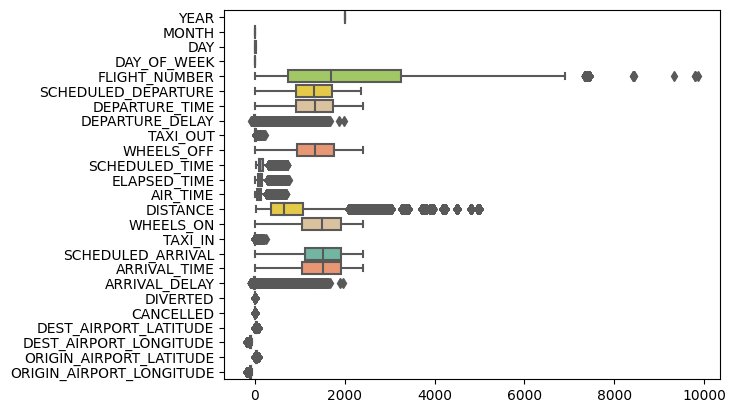

In [23]:
ax = sns.boxplot(data=mergedPD, orient="h", palette="Set2")

After accessing the data we can remove the outliers of the data field distance however for the delays outliers are understandable and expected and for flight number they are supposed to be consider unique 

In [24]:
mergedPD = remove_outlier(mergedPD,'DISTANCE')

We removed the outliers as to not skew are data while interpolation

In [25]:
mergedPD.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [26]:
mergedPD.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
FLIGHT_NUMBER               0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
DEST_AIRPORT_IATA_CODE      0
DEST_AIRPORT_NAME           0
DEST_AIRPORT_CITY           0
DEST_AIRPORT_STATE          0
DEST_AIRPORT_COUNTRY        0
DEST_AIRPORT_LATITUDE       0
DEST_AIRPORT_LONGITUDE      0
ORIGIN_AIRPORT_IATA_CODE    0
ORIGIN_AIRPORT_NAME         0
ORIGIN_AIRPORT_CITY         0
ORIGIN_AIRPORT_STATE        0
ORIGIN_AIRPORT_COUNTRY      0
ORIGIN_AIR

<h1>Now to generate the features</h1>

In [27]:
speed = (mergedPD['DISTANCE']/mergedPD['AIR_TIME']).astype(int)
mergedPD['AVERAGE_SPEED_MILES_PER_MIN'] = speed


this column will help us see if there are airlines with faster plannes than others

In [28]:
approx = (mergedPD['AIR_TIME']/mergedPD['SCHEDULED_TIME']).astype(float)
mergedPD['CLOSENESS_TO_SCHEDULED_TIME'] = approx


to help us see the how accurate the scheduled time it to the airtime 

In [38]:
waittime = (mergedPD['ELAPSED_TIME']-mergedPD['AIR_TIME']).astype(int)
mergedPD['WAIT_TIME'] = waittime


this will help us see how proportional is the elapsed time to the scheduled time 

In [30]:
pd.set_option('display.max_columns', None)
mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DEST_AIRPORT_IATA_CODE,DEST_AIRPORT_NAME,DEST_AIRPORT_CITY,DEST_AIRPORT_STATE,DEST_AIRPORT_COUNTRY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_IATA_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,AIRLINE_IATA_CODE,AIRLINE_NAME,AVERAGE_SPEED_MILES_PER_MIN,CLOSENESS_TO_SCHEDULED_TIME,WAIT_TIME
0,2015,1,1,4,98,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.,8,0.824390,-25
1,2015,1,1,4,108,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.,8,0.848039,-21
2,2015,1,1,4,136,135,90.5,-9.5,17.0,107.5,205.0,196.0,171.5,1448,499.0,7.5,600,506.5,-24.5,0,1,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.,8,0.836585,-24
3,2015,1,1,4,134,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.,8,0.779817,-28
4,2015,1,1,4,114,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.,8,0.880000,-23


C:\Users\Yahia\AppData\Local\Temp\ipykernel_12264\573404064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mergedPD.corr())


<AxesSubplot: >

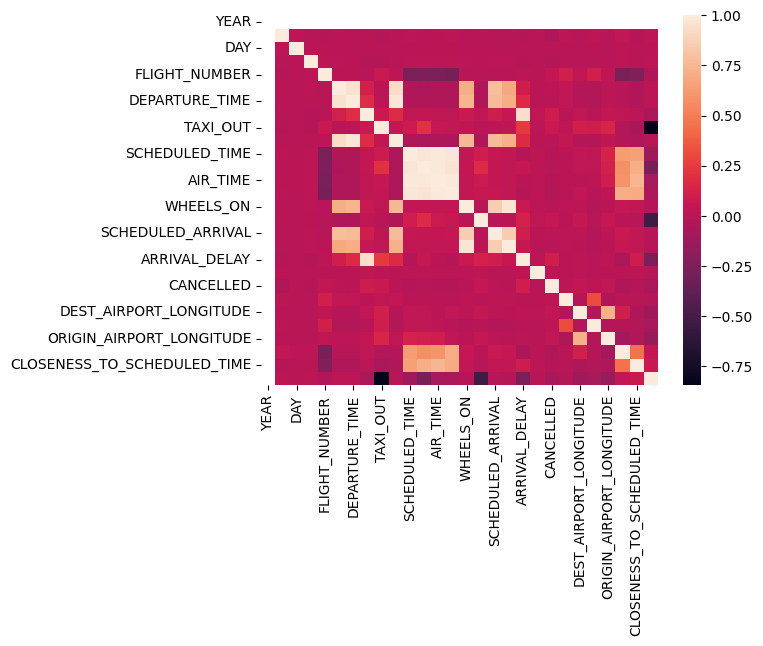

In [31]:
sns.heatmap(mergedPD.corr())

We created this heatmap to check for any abnormalities that may show correlation that we may have over looked 

<AxesSubplot: xlabel='AIRLINE_IATA_CODE', ylabel='ARRIVAL_DELAY'>

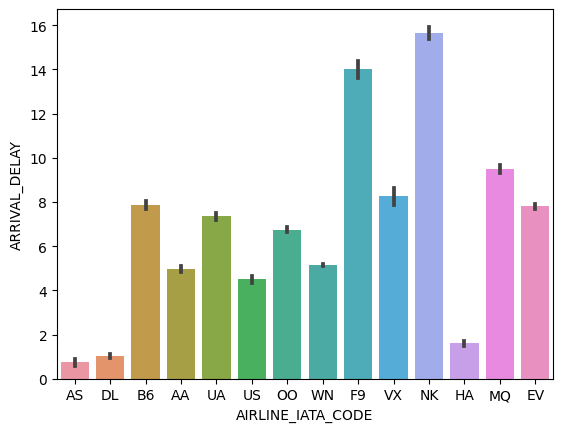

In [32]:
sns.barplot(x = "AIRLINE_IATA_CODE", y = "ARRIVAL_DELAY", data = mergedPD)

Firstly we attempted to map the airlines to the arrival delay to see which airline has the most delay and that would be NK this can act as bench mark to understand whether it will have an impact on our coming research questions 

(680.0, 750.0)

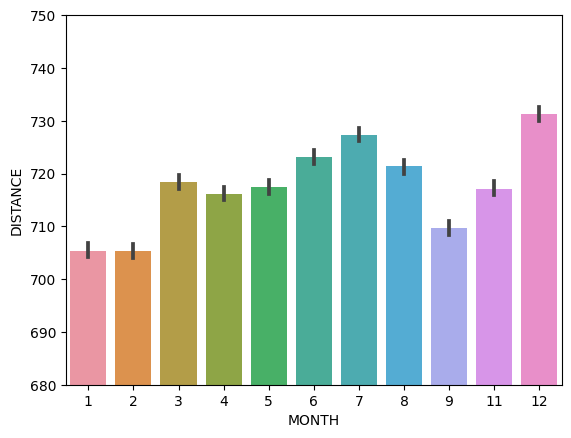

In [33]:

temp1 = mergedPD.copy()
temp1= temp1.drop(temp1[temp1.DISTANCE < 600].index) 

ax = sns.barplot(data=mergedPD, x="MONTH",y='DISTANCE')
ax.set_ylim(680, 750)

<h2>How does the month effect the number of flights in the month</h2>
Justification & Answer: We can see that distance is alternates throughout the year reaching a high around december this can be justified as these flights focus on a region that takes mostly takes that period off due to end of year festivities chrismas etc.. Moreover, during the summer vacation period they presented a dome shape as most that is when the students are availble to take long trips also with the the march- april season which can be seen as the spring break season all other months have less average distance as they are occupied by mostly business related trips which are for the most part are not too far from each other 

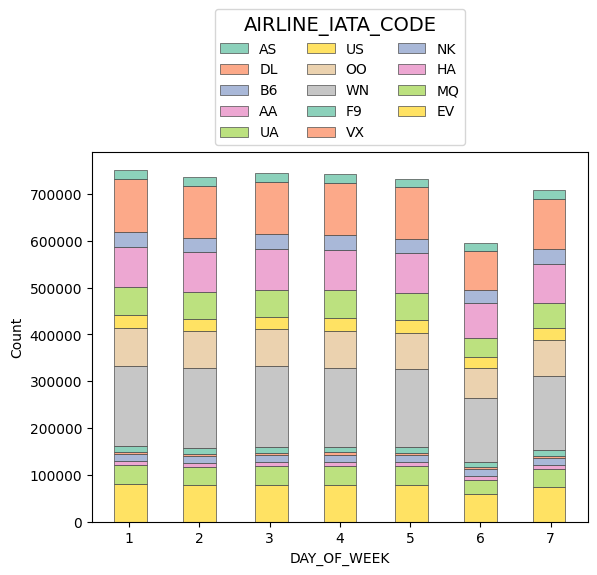

In [34]:
ax = sns.histplot(data=mergedPD, x="DAY_OF_WEEK", hue='AIRLINE_IATA_CODE', multiple="stack", shrink=10, palette="Set2", edgecolor=".3", linewidth=.5)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title_fontsize=14)


<h1>Are days there certain days of the week individuals travel more on and does the day of the week impact the airline</h1>
We can see from the graph that certain days are not too popular with travel namly Saturdays in specific. Furthermore as indicated by the graph throughout the week's days the distribution of the market amongst different airlines stayed the same with WN dominating most of market sales. In addition Monday is the day with the most flights

(3.0, 7.0)

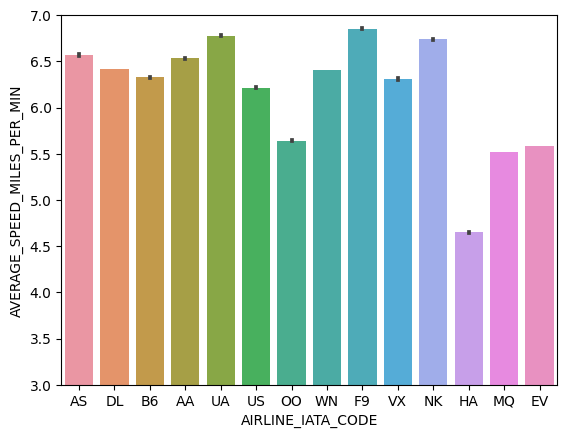

In [35]:
ax1 = sns.barplot(x = "AIRLINE_IATA_CODE", y = "AVERAGE_SPEED_MILES_PER_MIN", data = mergedPD)
ax1.set_ylim(3, 7)

<h2>Which airlines have the fastest planes</h2>
Justification & Answer: We have attempted to use the data to generate a new feature ie average speed to determine an airline's quality hence whether or not it's planes were fast enough we can see from the previous visualization that HA had the slowest planes as it's average was very clearly below the competion meaning that in general it's passangers spent more time in the air per mile in comparison to it's competitors 

(0.5, 1.0)

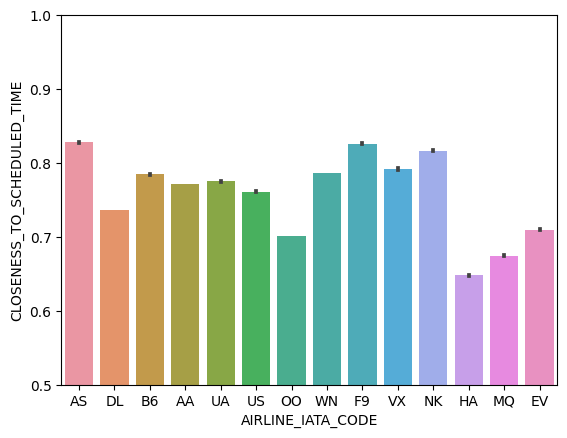

In [36]:
ax2 = sns.barplot(x = "AIRLINE_IATA_CODE", y = "CLOSENESS_TO_SCHEDULED_TIME", data = mergedPD)
ax2.set_ylim(0.5, 1)

<h2>Which airline is comes before the scheduled time the most</h2>
Justtification & Answer: We try to see which airline was more effective and adhered to its given schedual for context lower in this case represents a higher quality as it was closer to the given scheduled time in this case than HA (Hawaiian Airlines) as it tends to adhere to it's scheduled time way less than it's competitors meaning that it has reached earlier from it's schedule the most 

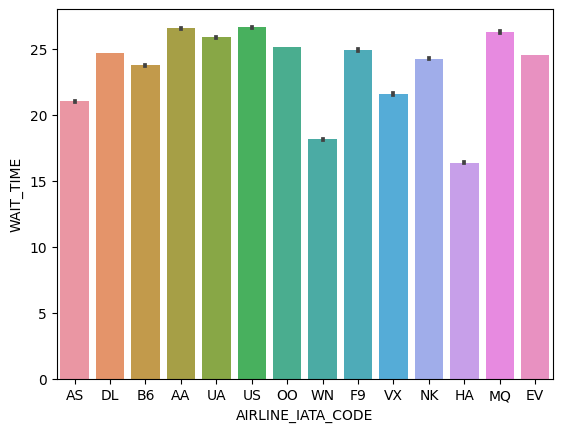

In [39]:
ax2 = sns.barplot(x = "AIRLINE_IATA_CODE", y = "WAIT_TIME", data = mergedPD)


<h2>Do certain airlines have less wait times than others</h2>
Justification & Answer:
This data shows that the airline with the least wait time is Hawaian Airlines. This is better for the passengers as from the time they land to the time they enter the airport is less which is better